**Business Problem**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

1. Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
2. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

## Needfuls

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn-notebook")
import datetime as dt
import functools
from matplotlib.ticker import FormatStrFormatter

### Load Dataset & Data Preparation

#### Load Dataset

In [2]:
data = pd.read_csv("aerofit_treadmill.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


#### Checking for Null Values

In [3]:
data.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

#### Duplicate Values

In [4]:
data.duplicated().sum()

0

#### Code

In [5]:
class Data:
    def __init__(self, data):
        self.data = data
        self.grouped = self.data.groupby(["Product"])
    
    @property
    def keys(self):
        keys = []
        for k, v in self.grouped:
            keys.append(k)
        return keys
    
    def get(self, group):
        return self.grouped.get_group(group)
    
    
class ProductWiseDistributions:
    def __init__(self, data):
        self.data = Data(data)
        self.keys = self.data.keys
    
    def _calculate_outliers(self, data):
        q1 = data.quantile(.25)
        q2 = data.quantile(.50)
        q3 = data.quantile(.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        return lower, upper
        
    def _plot(self, fig, ax, data, product, index, kind, bins, title):
        if kind == 'hist':
            hist = data.plot(kind = kind, ax=ax[index], bins=bins, density=True, color=(np.random.random(), np.random.random(), np.random.random()), ec='white', grid=True)
            ax[index].axvline(data.mean()[0], color='y', linestyle='--',linewidth=2, label="Mean")
            ax[index].axvline(data.median()[0], color='r', linestyle='dashed',linewidth=2, label="Median")
            ax[index].axvline(data.mode().iloc[0][0], color='g', linestyle='solid',linewidth=2, label="Mode")
            ax[index].legend({f'Mean {round(data.mean().iloc[0], 2)}':data.mean(),
                              f'Median {round(data.median().iloc[0], 2)}':data.median(),f'Mode {round(data.mode().iloc[0][0], 2)}':data.mode(), f'Support {len(data)}': len(data)})
            ax[index].set_ylabel(title, fontsize=15)
            
            # Outliers
            lower, upper = self._calculate_outliers(data)
            ax[index].axvspan(lower[0], upper[0], alpha = 0.2, color = 'grey')            
        elif kind == 'pie':
            data.plot(kind = kind, ax=ax[index], autopct='%1.2f%%', colors = ['green', 'yellow'])
            ax[index].set_ylabel(title, fontsize=15)
        else:
            data.plot(kind = kind, ax=ax[index])
            ax[index].set_ylabel(title, fontsize=15)
        ax[index].set_xlabel(product, fontsize=12)

    def plot_wrapper(title = "Default Title", kind='hist', bins=25):
        def decorator(func):
            @functools.wraps(func)
            def wrapper(self):
                fig, ax = plt.subplots(1, len(self.keys), figsize=(7 * (len(self.keys)), 4), sharey=True)
                for index, product in enumerate(self.keys):
                    plotting_data = func(self, product)
                    self._plot(fig = fig, ax = ax, product = product, data = plotting_data, index = index, kind = kind, bins = bins, title = title)
                plt.show()
            return wrapper
        return decorator
    
    def gender_income(self):
        gender_income_data = self._data.groupby("Gender")
        keys = []
        for k, v in gender_income_data:
            keys.append(k)
        fig, ax = plt.subplots(1, len(keys), figsize=(7 * (len(keys)), 4), sharey=True)
        for index, gender in enumerate(keys):
            plotting_data = gender_income_data.get_group(gender)["Income"]
            self._plot(fig = fig, ax = ax, product = gender, data = plotting_data, index = index, kind = 'box', bins = 25, title = "Gender-Income Distribution")
        plt.show()
        
    @plot_wrapper(title = "Age-wise Density", kind='hist', bins=20)
    def age_distribution(self, product):
        age_data = self.data.get(product)[["Age"]]
        return age_data
    
    @plot_wrapper(title = "Income-wise Density", kind='hist', bins=15)
    def income_distribution(self, product):
        income_data = self.data.get(product)[["Income"]]
        return income_data
    
    @plot_wrapper(title = "Miles-wise Density", kind='hist', bins=10)
    def miles_distribution(self, product):
        miles_data = self.data.get(product)[["Miles"]]
        return miles_data
    
    @plot_wrapper(title = "Usage-wise Density", kind='hist', bins=5)
    def usage_distribution(self, product):
        usage_data = self.data.get(product)[["Usage"]]
        return usage_data
    
    @plot_wrapper(title = "Fitness-wise Density", kind='hist', bins=4)
    def fitness_distribution(self, product):
        fitness_data = self.data.get(product)[["Fitness"]]
        return fitness_data
    
    @plot_wrapper(title = "Education-wise Density", kind='hist', bins=6)
    def edu_distribution(self, product):
        edu_data = self.data.get(product)[["Education"]]
        return edu_data
    
    @plot_wrapper(title = "Partnership", kind='pie', bins=6)
    def marital_distribution(self, product):
        marital_data = self.data.get(product).groupby("MaritalStatus").count()["Gender"]
        return marital_data
    
    @plot_wrapper(title = "Gender", kind='pie', bins=6)
    def gender_distribution(self, product):
        gender_data = self.data.get(product).groupby("Gender").count()["MaritalStatus"]
        return gender_data
    
    def analytics(self):
        self.age_distribution()
        self.income_distribution()
        self.miles_distribution()
        self.usage_distribution()
        self.fitness_distribution()
        self.edu_distribution()
        self.marital_distribution()
        self.gender_distribution()
        
    @property
    def _data(self):
        return self.data.data
    
class GeneralAnalytics:
    def __init__(self, data):
        self.data = Data(data)
        self.keys = self.data.keys
    
    def violin_plots(self):
        cols = self._data.select_dtypes([np.number]).columns
        num_plots = len(cols)
        fig, ax = plt.subplots(1, num_plots, figsize=(35, 8))
        fig.suptitle("Variable Distribution", fontsize=20)
        for index, col in enumerate(cols):
            sns.violinplot(data = self._data[col], ax=ax[index], color = (np.random.random(), np.random.random(), np.random.random()), inner = 'box', grid=True)
            ax[index].get_children()[1].set_color('k')
            ax[index].get_children()[1].set_lw(5)
            
            ax[index].get_children()[2].set_color('w')
            ax[index].get_children()[3].set_color('w')
            ax[index].set_xticks([])
            ax[index].set_title(col, fontsize=14)
            ax[index].axhline(self._data[col].mean(), color = 'pink', lw = 4)
            ax[index].legend({f'Mean {round(self._data[col].mean(), 2)}':self._data[col].mean()})
        
    def correlation(self):
        fig, ax = plt.subplots(1, 1, figsize=(10, 5))
        fig.suptitle("Variable Correlation", fontsize=20)
        cols = self._data.select_dtypes([np.number]).columns
        corr = self._data[cols].corr().abs().unstack()
        sns.heatmap(data = self._data[cols].corr(), annot=True, lw=0.2, cmap='Greens')
    
    def product_sales(self):
        fig, ax = plt.subplots(1, 1, figsize=(10, 5))
        fig.suptitle("Most Sold", fontsize=20)
        sales_data = self._data.groupby("Product").count()["Gender"]
        sales_data.plot(kind='bar', rot=0, grid=True)
    
    def analytics(self):
        self.violin_plots()
        self.correlation()
    
    def comparitive_analysis(self, usage_miles = False, age_income = False, education_income = False, usage_age = False):
        sns.set(style="whitegrid", font_scale=1.25)
        if usage_miles:
            plot1 = sns.catplot(data = self._data, x='Usage',y='Miles', 
                                hue='Product', col='MaritalStatus', row='Gender', kind='box', sharex=False, height=6, aspect=1.25, palette='hot')
            
        if age_income:
            plot2 = sns.catplot(data = self._data, x='Age',y='Income', 
                                hue='Product', col='MaritalStatus', row='Gender', kind='box', sharex=False, height=6, aspect=1.25, palette='hot')
            
        if education_income:
            plot3 = sns.catplot(data = self._data, x='Education', y='Income', 
                                hue='Product', col='MaritalStatus', row='Gender', kind='box', sharex=False, height=6, aspect=1.25, palette='hot')
        
        if usage_age:
            plot4 = sns.catplot(data = self._data, x='Usage', y='Age', 
                                hue='Product', col='MaritalStatus', row='Gender', kind='box', sharex=False, height=6, aspect=1.25, palette='hot')
    
    @staticmethod
    def plot_heatmap(cross_table, fmt='g'):
        fig, ax = plt.subplots(figsize=(8, 5))
        heatmap = sns.heatmap(cross_table,
                    annot=True,
                    fmt=fmt,
                    cmap='rocket_r',
                    linewidths=.5,
                    ax=ax)
        heatmap.set_xticklabels(heatmap.get_xticklabels(), 
                                rotation=45, 
                                horizontalalignment='right')
        plt.show();

    
    def contigency_table(self, index, columns, normalize=False, margins=False, margins_name=None, values=None, aggfunc=None, plot=False, fmt='g'):
        cross_data = self._data
        if values:
            values = cross_data[values]
            
        cross_table = pd.crosstab(index = [cross_data[idx] for idx in index], columns = [cross_data[col] for col in columns], 
                          normalize=normalize, 
                          margins=margins, margins_name=margins_name, 
                          values=values, aggfunc=aggfunc)
        
        if plot:
            GeneralAnalytics.plot_heatmap(cross_table, fmt=fmt)
        else:
            return cross_table
        
                
    @property
    def _data(self):
        return self.data.data

## Product-Wise Distributions

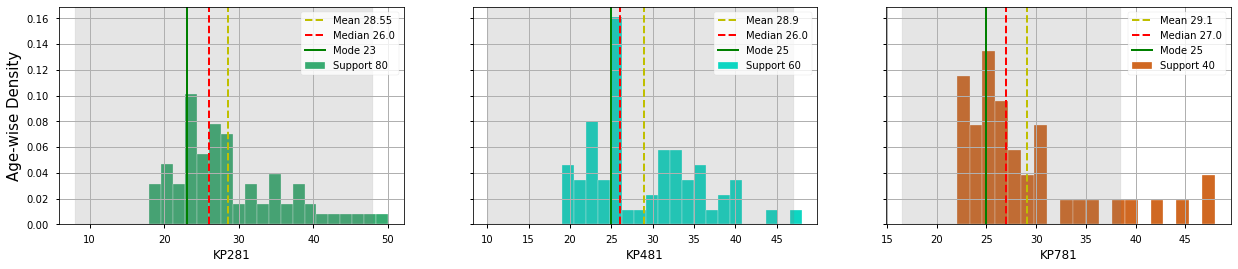

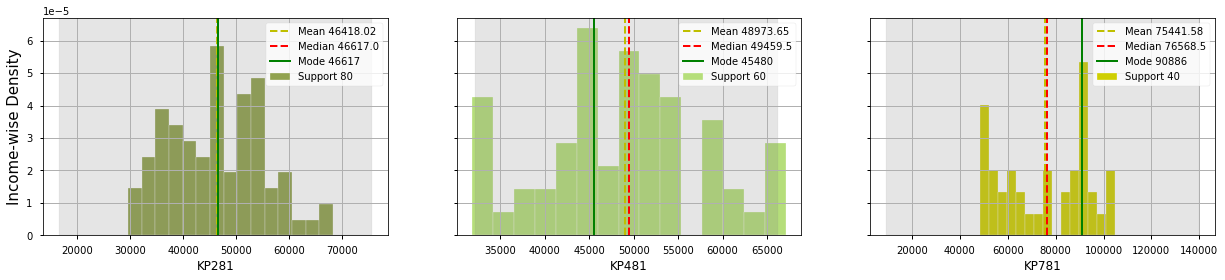

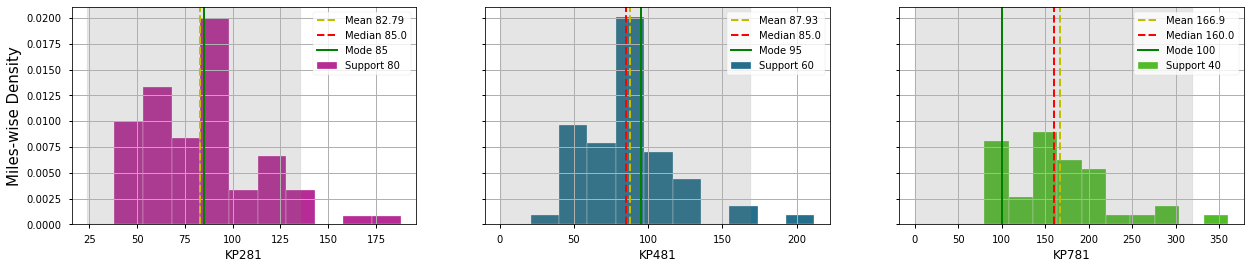

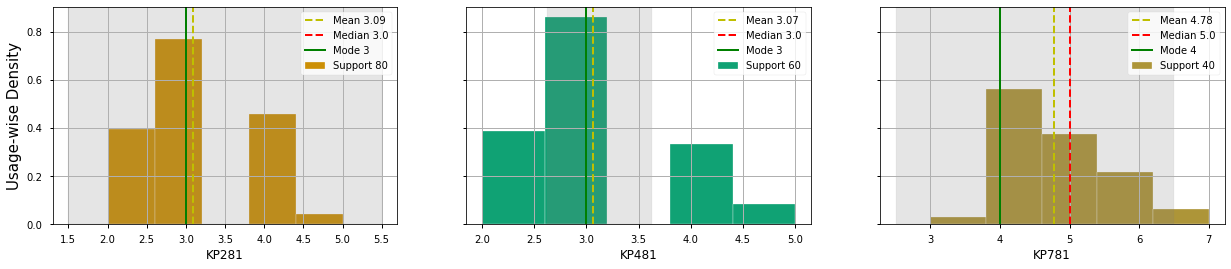

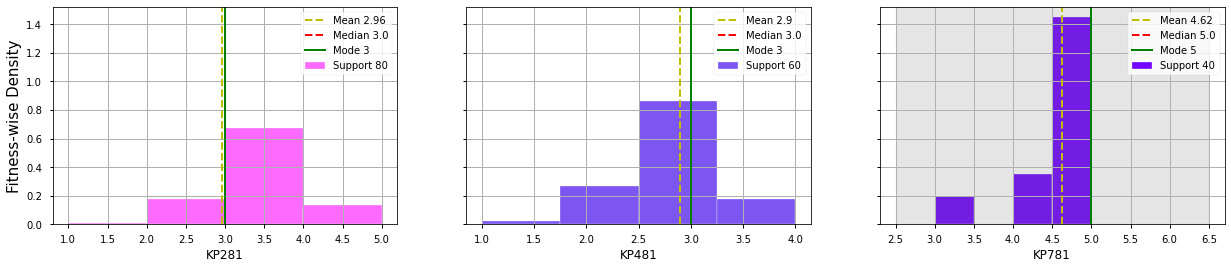

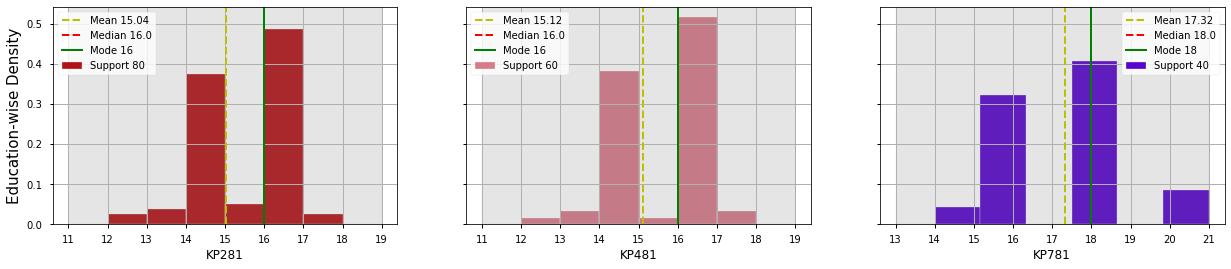

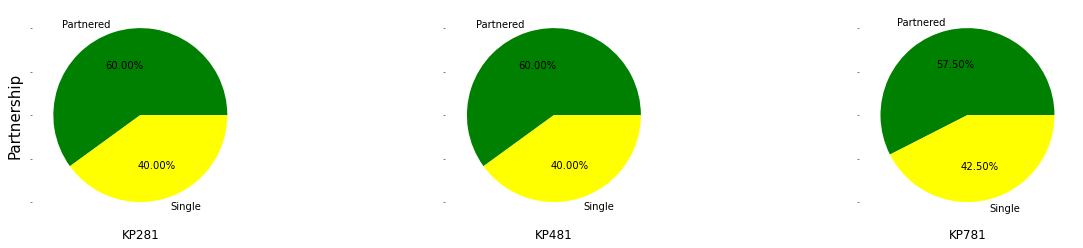

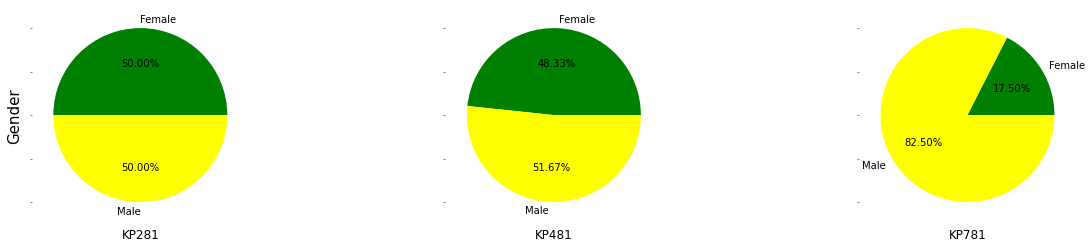

In [6]:
product_analytics = ProductWiseDistributions(data)
product_analytics.analytics()

| **Product-wise Feature Analysis**                       | **KP281**                                      | **KP481**                                                    | **KP781**                                                       |
| ---------------------- | ------------------------------------------ | -------------------------------------------------------- | ----------------------------------------------------------- |
| **Age-wise Density**       | Mode age: 23<br>Median age: 26             | Mode age: 25<br>Median age: 26                           | Mode age: 25<br>Median age: 27<br>Has right-tailed outliers |
| **Income-wise Density**    | Middle income group                        | Middle income group                                      | High income group                                           |
| **Miles-wise Density**     | Mode 85 miles<br>Has right-tailed outliers | Mode 95 miles<br>Has right-tailed outliers               | Mode 100 miles<br>Has right-tailed outliers                 |
| **Usage-wise Density**     | Mode 3 times                               | Mode 3 times<br>Has right-tailed and lef-tailed outliers | Mode 4 times                                                |
| **Fitness-wise Density**   | Median 3                                   | Median 3                                                 | Median 5                                                    |
| **Education-wise Density** | Mode 16                                    | Mode 16                                                  | Mode 18                                                     |
| **Partnership**            | 40% single                                 | 40% single                                               | 42.5% single                                                |
| **Gender**                 | Almost equal gender distribution           | Almost equal gender distribution                         | Highly concentrated to males                                |

<br>

**<center>**Points to Note**</center>**

| KP281                 | KP481                 | KP781                       |
| --------------------- | --------------------- | --------------------------- |
| Early 20s to mid 20s  | Early 20s to mid 20s  | Mid and Late 20s and beyond |
| Middle income group   | Middle income group   | High income group           |
| 16 years of education | 16 years of education | 18 years of education       |
| Gender neutral        | Gender neutral        | Majority males              |

<left>
    
    - Older people focus more on fitness.
    
    - People with KP781 report higher fitness levels.
    
    - Above are in line with the fact that KP781 reports higher miles and uasage density. Given the fact that older high income people use it, it is also safe to assume that KP781 attracts a financially richer market.
    
    - KP481 has a mix of people from both age groups and income classes.
    
    - KP281 attracts comparitively younger people.
    
    - Married people are more likely to purchase the treadmills.
</left>

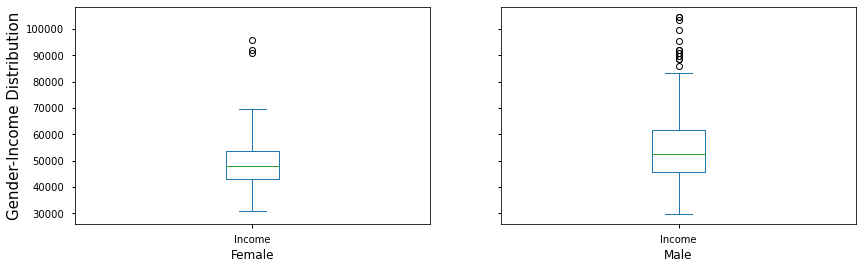

In [7]:
product_analytics.gender_income()

The fact that KP781 has a high majority of old male users, goes in hand with the income disparity as well. Males in general are higher paid with swinging outliers.

## General Analytics

In [8]:
general_analytics = GeneralAnalytics(data)

### Variable Distribution

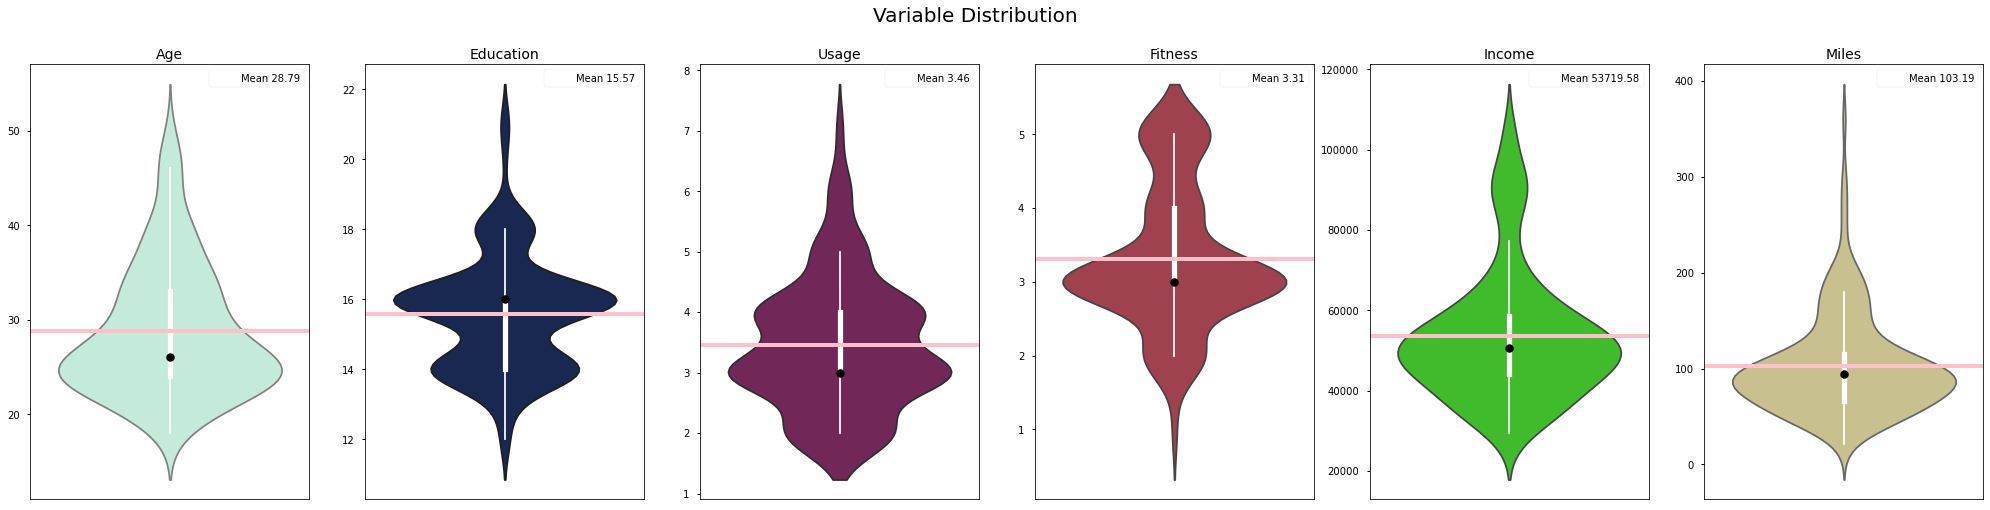

In [9]:
general_analytics.violin_plots()

**General Statistics:**
1. Age ranges from 18 to 50.
2. Education is between 12 and 21 years
3. Usage is from 2 to 7 days a week
4. Income goes from 20000 all the way to 120000.
5. Miles run range between 0 to 400.

**Points to Note:**
- Age is skewed to the right. Younger people (< 30yrs.) in general buy more treadmills.
- Typical education ranges from 15.5 to 16 years. Most people are graduates. However, a small bump towards 18 years of education indicates a small market among post-graduates too.
- Most people run for 3 days and on average 3.5 days. There is bump at 4 days, which might indicate higher usage by the KP781 buyers.
- Most people earn arund 50k
- Typical miles run is just over 80.

### Variable Correlation

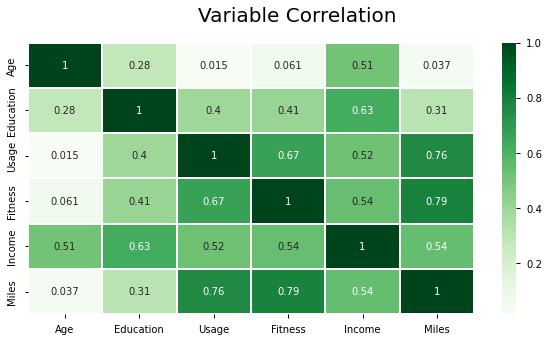

In [10]:
general_analytics.correlation()

Miles-fitness-usage all show high correlation which is expected.

### Product-wise Sales

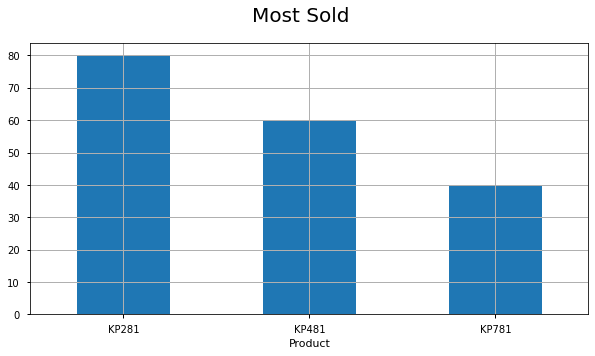

In [11]:
general_analytics.product_sales()

Maximum sold product is KP281, followed by KP481 and lastly KP781.

### Usage-Miles | Gender-Marital Status Product-wise Breakup

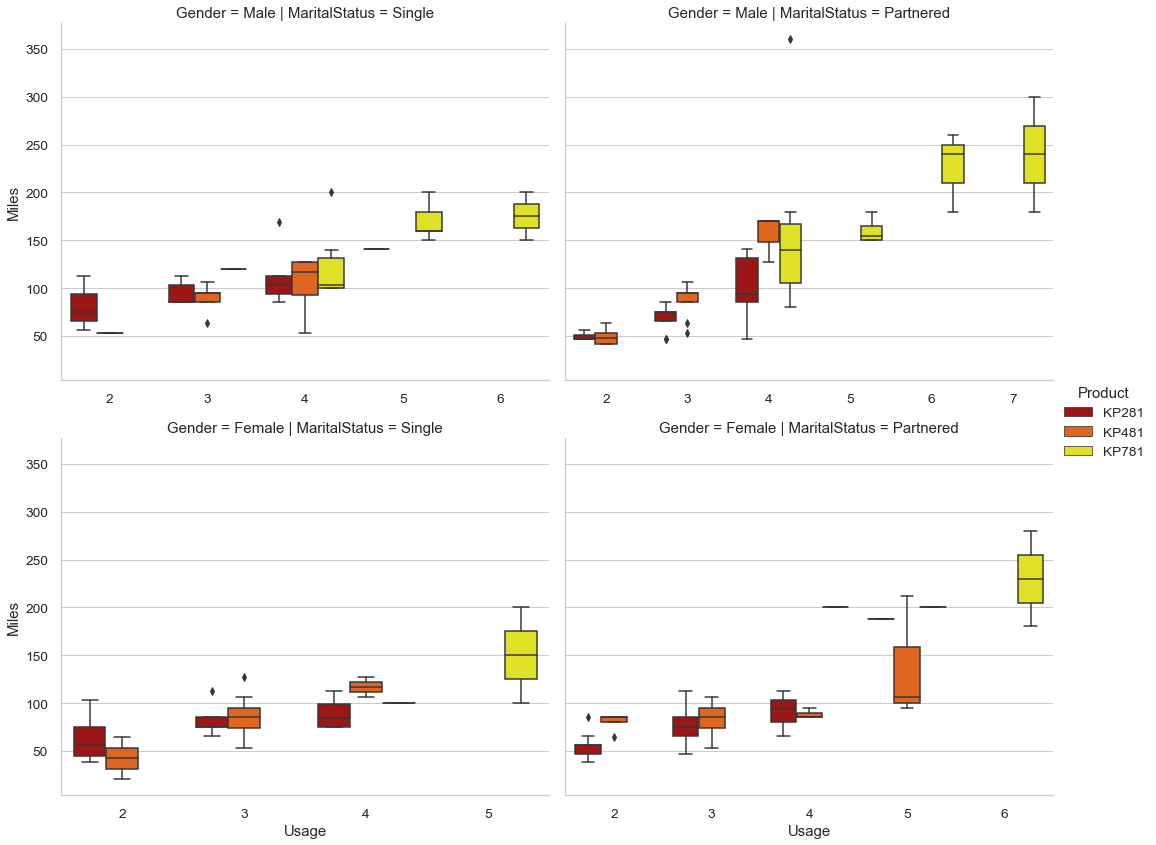

In [12]:
general_analytics.comparitive_analysis(usage_miles = True)

- In general, above average miles are usually done on KP781 for both males and females.
- Single males typically have a usage of 4 per week for average miles run.
- Partnered males and females have more variability in usage.
- Females usually prefer KP281 and KP481 and have much less outliers in terms of usage.

In [13]:
### Age-Income | Gender-Marital Status Product-wise Breakup

### Education-Income | Gender-Marital Status Product-wise Breakup

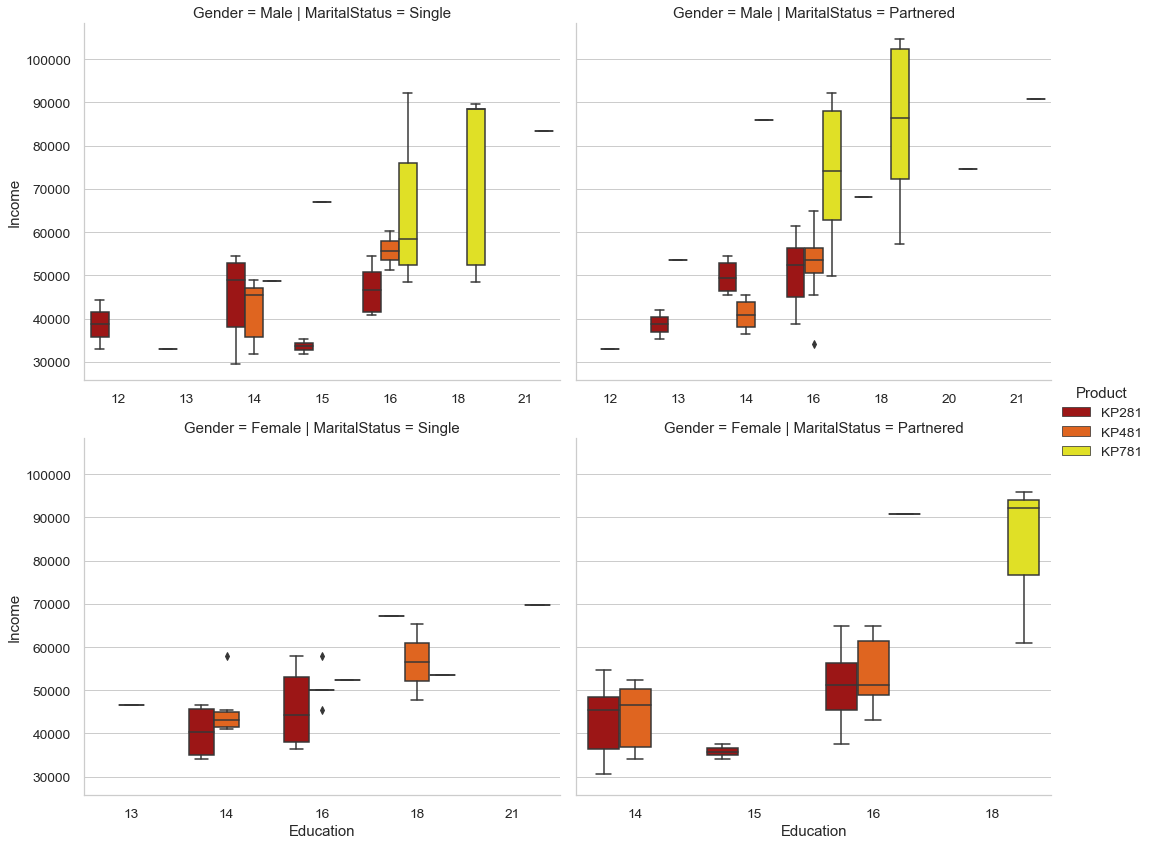

In [14]:
general_analytics.comparitive_analysis(education_income = True)

- Single educated males have high income variability, while females don't go above 70000.
- Single females stick to models 1 and 2. Males with 16 or more years of education might use KP781.
- Observations for married people are similar as the previous analysis.

In [15]:
### Usage-Age | Gender-Marital Status Product-wise Breakup

## Contigency Tables

### Gender-Partner Table

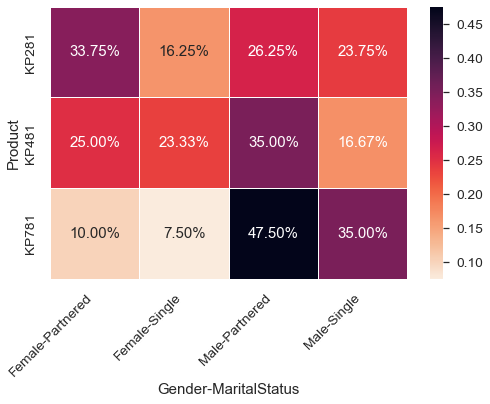

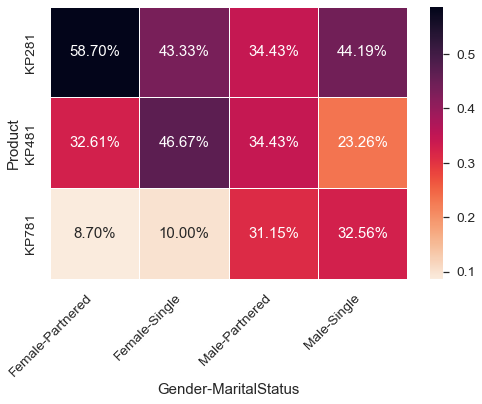

In [16]:
# Across rows
general_analytics.contigency_table(index=["Product"], columns = ["Gender", "MaritalStatus"], normalize='index', plot=True, fmt='.2%')

# Across columns
general_analytics.contigency_table(index=["Product"], columns = ["Gender", "MaritalStatus"], normalize='columns', plot=True, fmt='.2%')

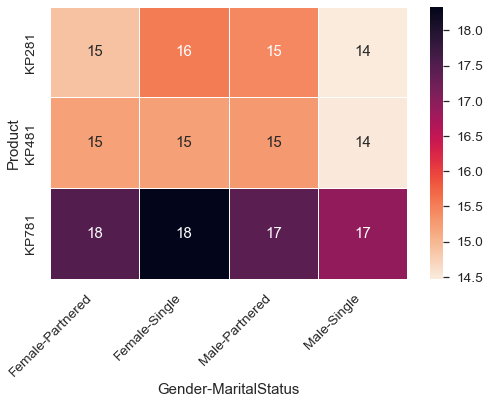

In [17]:
general_analytics.contigency_table(index=["Product"], columns = ["Gender", "MaritalStatus"], values=["Education"], aggfunc = np.mean, plot=True, fmt='.0f')

---
## Customer Segementation

Based on all the above points, we can define customers each type of product as follows:

**Product-wise:**

**KP281**
1. Gender neutral
2. Early 20s to mid 20s
3. 14 to 16 years of education
4. Earns between 40k to 50k
5. Usage 3 times a week

**KP481**
1. Gender neutral
2. Early 20s to mid 20s
3. 14 to 16 years of education
4. Earns between 45k to 60k
5. Usage 3 times a week

**KP781**
1. Males
2. Mid 20s, late 20s and beyond
3. 16 to 18 years of education
4. Earns between 50k to 90k
5. Usage 4 times a week
---

**General - Gender - Partnership**

**General Market**
1. Younger people (< 30 years)
2. Graduates (16 yrs. of education)
3. Gender neutral

**Partnered-females** 
1. 58% likely to buy KP281 with roughly 14 to 16 years of education. 
2. More likely to buy KP781 with more than 16 years of education.

**Single-females** 
1. 90% likely to buy KP281 or KP481 with roughly 14 to 16 years of education.
2. More likely to buy KP781 with more than 16 years of education.

**Partnered-males** 
1. Almost equally likely to buy any of the three. 
2. More likely to buy KP781 with more than 16 years of education.

**Single-male** 
1. 44% likely to buy KP281 with roughly 14 years of education.
2. 32% likely to buy KP781 with more than 16 years of education.

## Recommendations

Based on the general-gender-partnership categories, the customer profile can be built up as they enter the store. 

Once identified, product shortlisting can be done on likeliness to buy one. Based on further information for income, usage and age, product between 3 segments can be pitched.

In [ ]:
# Additions
# 1. Categories - Married | Single - Amount spent on each product by singles or married
# 2. Can do clustering later
# 3. Bar chart with age buckets and spending nature for each product - for ex, what is the age bucket for a particular product. Similar with other numerical data
# 4. Correlation between gender and others by converting gender to numerical
# 5. Convert categorical vars to numerical vars